In [16]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os 
import sys


from scipy.sparse import csr_matrix
os.chdir("C:\DataScience_DSC_630\Week9\ml-latest-small")

In [ ]:
#!{sys.executable} -m pip2.7 install 

In [2]:
#Loading data sets the ones needed are df_movies, df_ratings 

#List of movies
df_movies = pd.read_csv("movies.csv")

#Link of movies 
df_links = pd.read_csv("links.csv")

#Ratings of movies

df_ratings = pd.read_csv("ratings.csv")

# Links used for algorithm

In [ ]:
#https://www.kdnuggets.com/2019/09/machine-learning-recommender-systems.html
#https://www.kaggle.com/code/sankha1998/collaborative-movie-recommendation-system
#https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea


In [3]:
df_movies.head(6)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


In [4]:
df_ratings.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [6]:
#merging by movie id
df_movie_rating = pd.merge(df_movies,df_ratings, on="movieId")

In [7]:
df_movie_rating.head(1)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703


In [11]:
#Seeing if the highest rated correlates to what a person will watch
highest_rated = df_movie_rating.groupby(['title'])[['rating']].sum()

In [14]:
highest_rated = highest_rated.nlargest(10,'rating')

<BarContainer object of 10 artists>

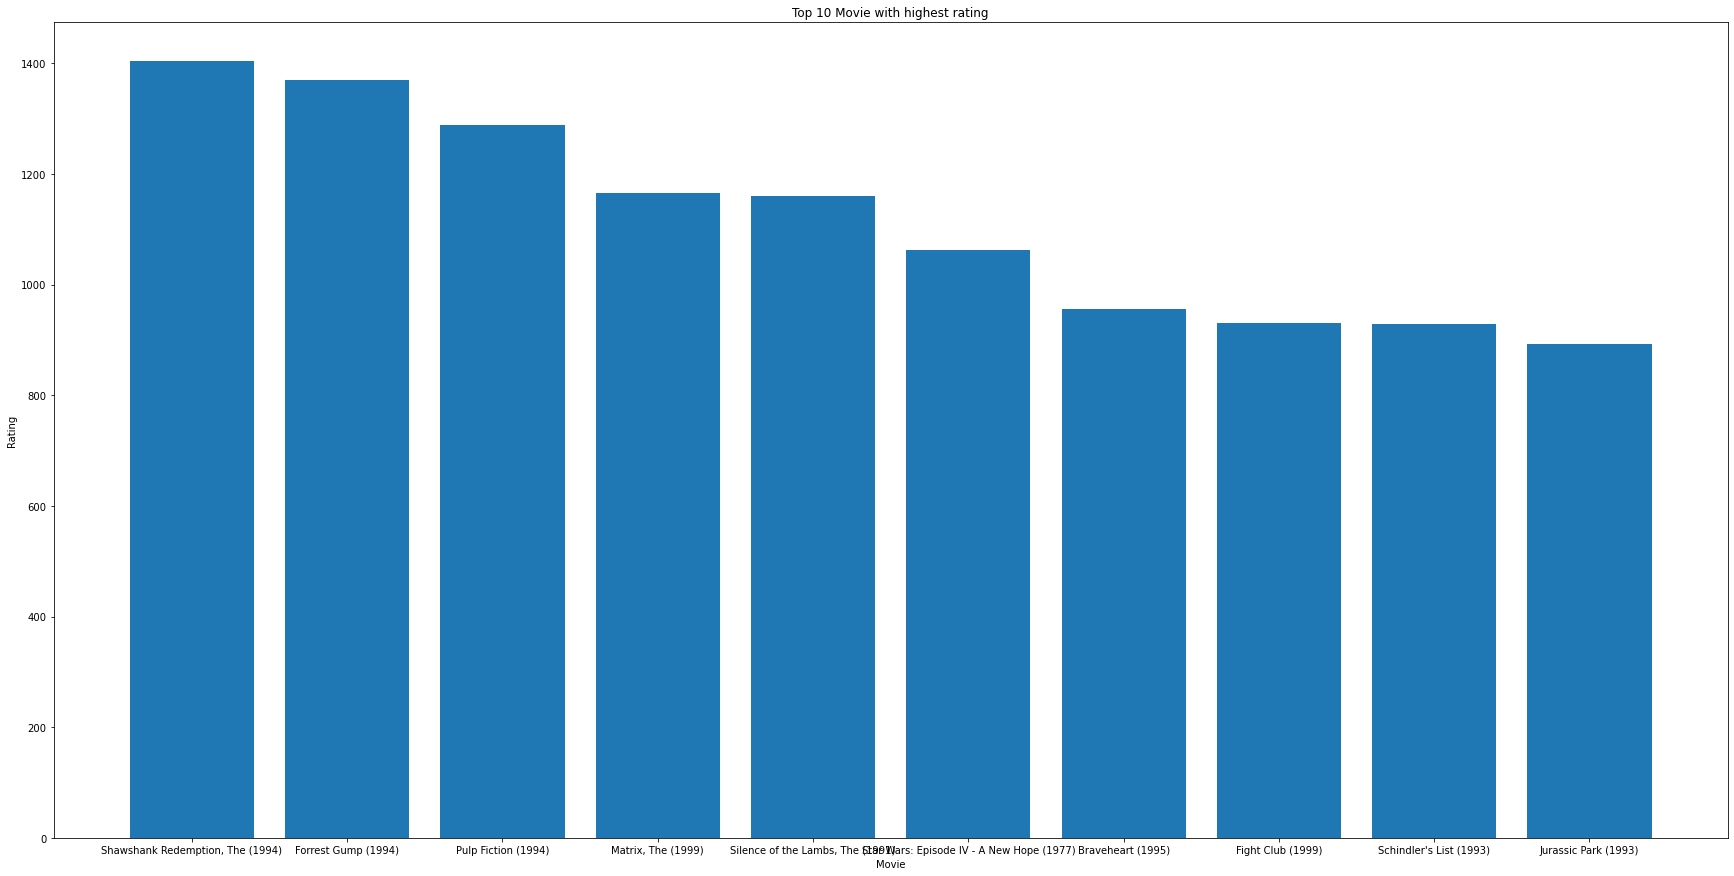

In [23]:
plt.figure(figsize=(30,15))
plt.title("Top 10 Movie with highest rating")
plt.xlabel("Movie")
plt.ylabel("Rating")
plt.bar(highest_rated.index,highest_rated['rating'])

In [7]:
#Dropping the time stamp not needed in this case
df_movie_rating.drop(columns=['timestamp'],inplace=True)

In [8]:
df_movie_rating.drop_duplicates(['title','userId'],inplace=True)

In [9]:
#making a pivot table that can be indexed
movie_pivot=df_movie_rating.pivot_table(columns='userId',index='title',values='rating')

In [10]:
#alot of na filling with zero
movie_pivot.fillna(0,inplace=True)

In [11]:
movie_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [12]:
#taking out 0s for memory space
#keep section with value to reduce memory space
from scipy.sparse import csr_matrix
movie_sparse=csr_matrix(movie_pivot)

In [13]:
#Running k nearest with nearest of ten 
#Algorithm taken from https://www.kaggle.com/code/sankha1998/collaborative-movie-recommendation-system
knn_model = NearestNeighbors( n_neighbors=10,algorithm='brute',metric='cosine')

In [14]:
knn_model.fit(movie_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [15]:
#Getting the distance and suggestion of movie pivot 
distances,suggestions=knn_model.kneighbors(movie_pivot.iloc[540,:].values.reshape(1,-1))

In [16]:
suggestions

array([[ 540, 7060, 4084, 7763, 3404, 2142, 6916, 2962, 4669, 2096]],
      dtype=int64)

In [17]:
df_movie_rating.head(1)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0


In [18]:
# Method used from https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea
def recommend_movies(movie_name):

    #taking title and getting movie id
    movie_id=df_movie_rating[df_movie_rating['title']== movie_name].drop_duplicates('title')['movieId'].values[0]
    
    #passing id in pivot index , should return suggestions based off the movie id
    distances,suggestions=knn_model.kneighbors(movie_pivot.iloc[movie_id,:].values.reshape(1,-1))
    
    for i in range(len(suggestions)):
        #will return the tile as its refered to index
        return(movie_pivot.index[suggestions[i]])
    
    
    
    
    
    
    


In [19]:
#Hold and array of titles, once one title is passed
rec_movie = recommend_movies('Toy Story (1995)')

In [20]:
#titles of ten suggested 
print("Movie Suggestions \n")
for i in rec_movie:
    print(i)

Movie Suggestions 

Monsters (2010)
Space Battleship Yamato (2010)
'Hellboy': The Seeds of Creation (2004)
All the Right Moves (1983)
Hidden Fortress, The (Kakushi-toride no san-akunin) (1958)
...And Justice for All (1979)
'Round Midnight (1986)
Kagemusha (1980)
Sanjuro (Tsubaki Sanjûrô) (1962)
Ghost Rider: Spirit of Vengeance (2012)


Overall, the algorithm predicts outside of the highest rated movies. This means that that algorithm predicts the distance between values of the toy story movie, instead of just the highest rating itself. In other words, it attempts to find the closest relation to the movie. The ratings are factor to the algorithm main component. The method finds the title then returns the id of the recommended. I will concluded that this algorithm seemed to be the best option for this assignment.